In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [223]:
housing= pd.read_csv("housing.csv")

In [224]:
housing.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [225]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [226]:
housing.shape

(545, 13)

In [227]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [228]:
housing.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

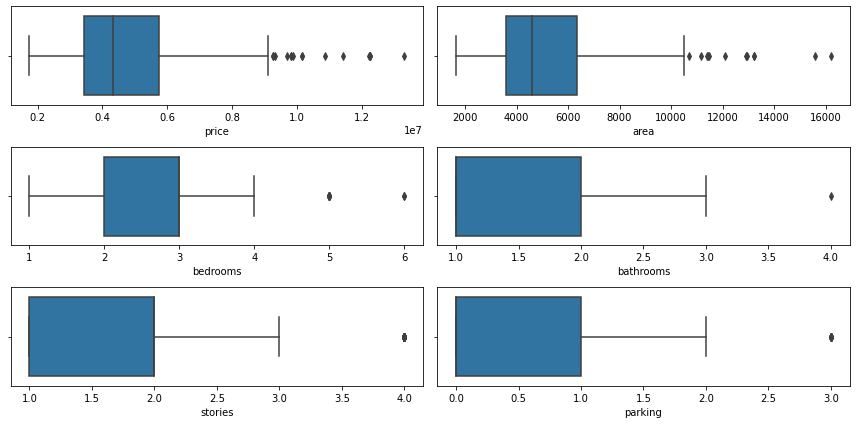

In [229]:
fig,axes = plt.subplots(3,2,figsize=(12,6))
plt1= sns.boxplot(x= 'price',data= housing ,ax =axes[0,0])
plt2= sns.boxplot(x='area', data=housing, ax= axes[0,1])
plt3= sns.boxplot(x='bedrooms',data=housing,ax= axes[1,0] )
plt4= sns.boxplot(x='bathrooms',data=housing, ax= axes[1,1])
plt5= sns.boxplot(x='stories',data=housing, ax= axes[2,0])
plt6= sns.boxplot(x='parking', data=housing,ax= axes[2,1])

plt.tight_layout()


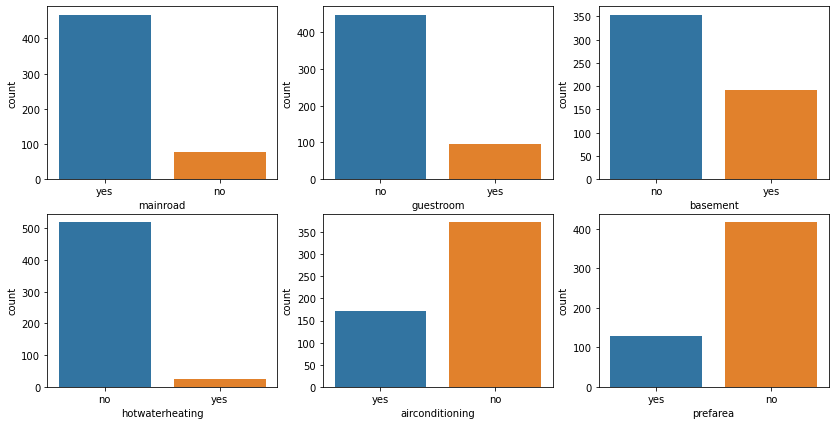

In [230]:
fig,axes= plt.subplots(2,3,figsize=(14,7))
plot1= sns.countplot(x= 'mainroad', data= housing ,ax= axes[0,0])
plot2 = sns.countplot(x= 'guestroom', data= housing ,ax= axes[0,1])
plot3 = sns.countplot(x= 'basement', data= housing ,ax= axes[0,2])
plot4 = sns.countplot(x= 'hotwaterheating', data= housing ,ax= axes[1,0])
plot5 = sns.countplot(x= 'airconditioning', data= housing ,ax= axes[1,1])
plot6 = sns.countplot(x= 'prefarea', data= housing ,ax= axes[1,2])

plt.show()

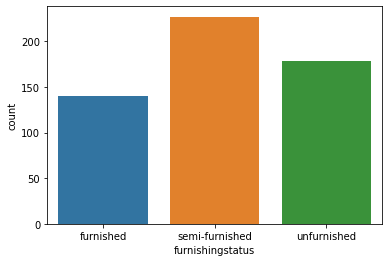

In [231]:
sns.countplot(x= 'furnishingstatus', data= housing)
plt.show()

In [232]:
# These are the indexes of the outliers in the area column 
print(np.where(housing['area']>11000))

(array([  7,  10,  56,  64,  66,  69, 125, 129, 186, 211, 403]),)


In [233]:
#Eliminating the outliers
print("Old Shape: ", housing.shape)
Q1= housing['area'].quantile(0.25)
Q3= housing['area'].quantile(0.75)
IQR = Q3-Q1
lower = Q1-(1.5*IQR)
upper = Q3+(1.5*IQR)
housing= housing[(housing['area'] >= lower) & (housing['area'] <= upper)]
print("New Shape: ",housing.shape)


Old Shape:  (545, 13)
New Shape:  (533, 13)


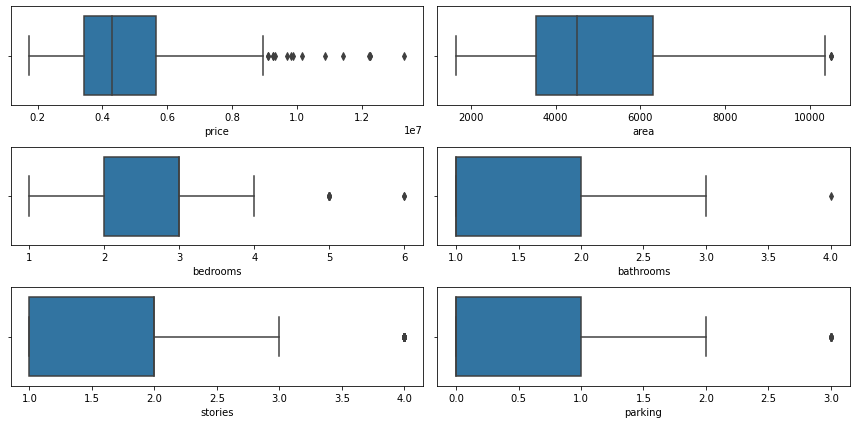

In [234]:
fig,axes = plt.subplots(3,2,figsize=(12,6))
plt1= sns.boxplot(x= 'price',data= housing ,ax =axes[0,0])
plt2= sns.boxplot(x='area', data=housing, ax= axes[0,1])
plt3= sns.boxplot(x='bedrooms',data=housing,ax= axes[1,0] )
plt4= sns.boxplot(x='bathrooms',data=housing, ax= axes[1,1])
plt5= sns.boxplot(x='stories',data=housing, ax= axes[2,0])
plt6= sns.boxplot(x='parking', data=housing,ax= axes[2,1])

plt.tight_layout()

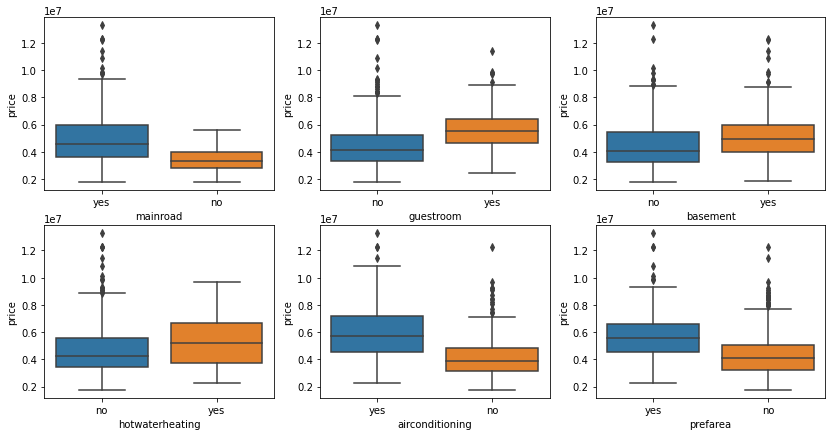

In [235]:
fig,axes= plt.subplots(2,3,figsize=(14,7))
plot1= sns.boxplot(x= 'mainroad',y='price', data= housing ,ax= axes[0,0])
plot2 = sns.boxplot(x= 'guestroom',y='price', data= housing ,ax= axes[0,1])
plot3 = sns.boxplot(x= 'basement', y='price', data= housing ,ax= axes[0,2])
plot4 = sns.boxplot(x= 'hotwaterheating',y='price', data= housing ,ax= axes[1,0])
plot5 = sns.boxplot(x= 'airconditioning',y='price', data= housing ,ax= axes[1,1])
plot6 = sns.boxplot(x= 'prefarea', y='price', data= housing ,ax= axes[1,2])

plt.show()

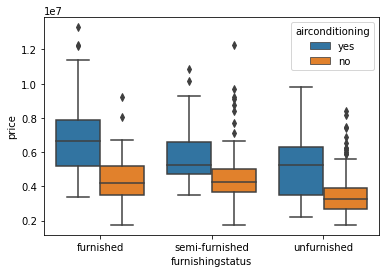

In [236]:
sns.boxplot(x= 'furnishingstatus',y='price',hue='airconditioning', data= housing)
plt.show()

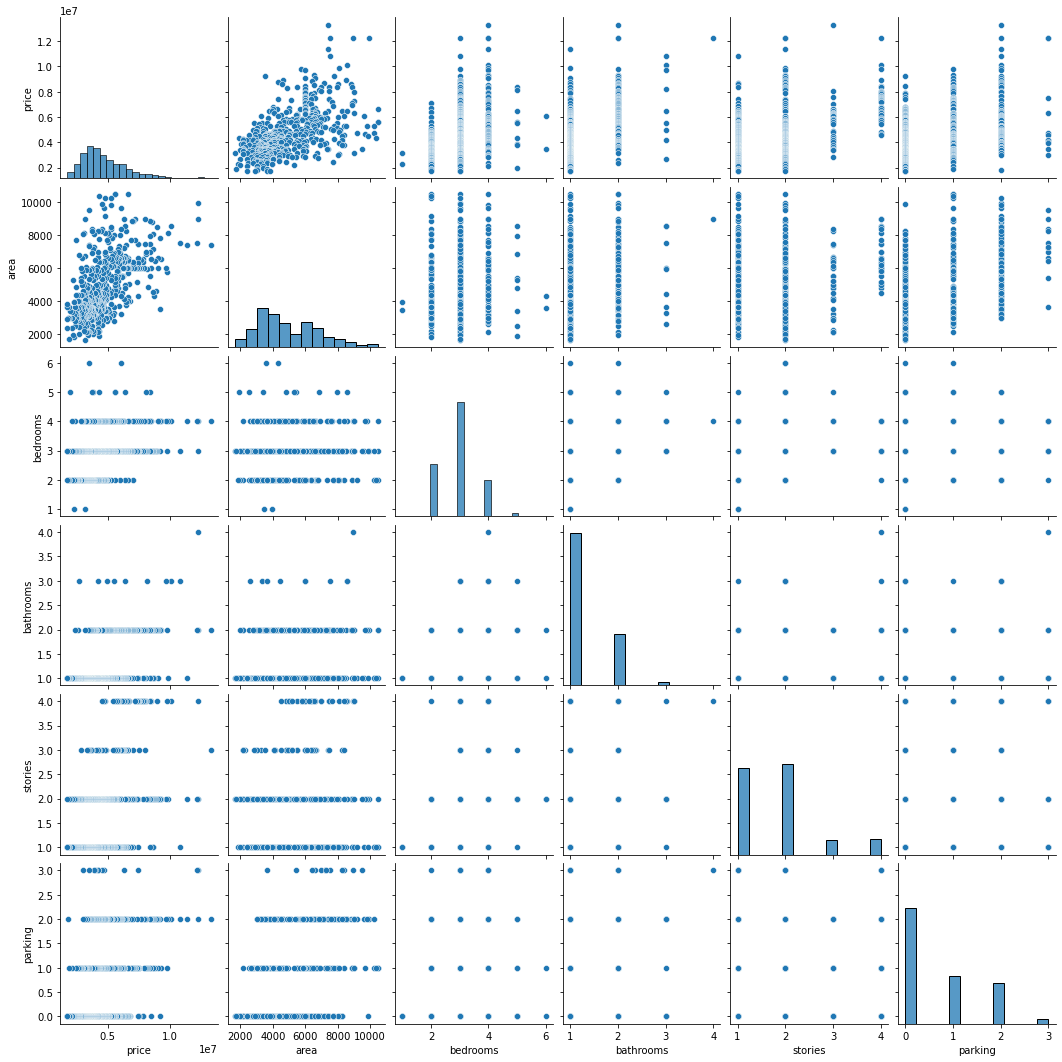

In [237]:
sns.pairplot(housing)
plt.show()

In [238]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [239]:
housing.iloc[2]

price                     12250000
area                          9960
bedrooms                         3
bathrooms                        2
stories                          2
mainroad                       yes
guestroom                       no
basement                       yes
hotwaterheating                 no
airconditioning                 no
parking                          2
prefarea                       yes
furnishingstatus    semi-furnished
Name: 2, dtype: object

In [240]:
# Converting the "yes" and "no" to "1" and "0" for the columns
map_housing= {"yes":1, "no":0}
housing = housing.applymap(lambda x: map_housing.get(x,x))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


#Above problem can also be solved using replace function
housing.replace(map_housing,inplace=True)

In [241]:
#Convert furnishing status with 3 levels into mutilple binary columns
status= pd.get_dummies(housing['furnishingstatus'],drop_first=True)
housing= pd.concat([housing,status],axis=1)
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished,0,0


In [242]:
# Drop the furnishingstatus column
housing.drop(['furnishingstatus'],axis=1, inplace=True)

In [243]:
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [244]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
housing_train, housing_test = train_test_split(housing, test_size=0.3, random_state=100)

In [245]:
# Scaling is done to minimize the magnitude of the data
from sklearn.preprocessing import MinMaxScaler


In [246]:
scaler= MinMaxScaler()

#we want to scale all columns except mapped and dummy.
scale_housing= ['price','area','bedrooms', 'bathrooms','stories','parking']
housing_train[scale_housing] = scaler.fit_transform(housing_train[scale_housing])

In [247]:
housing_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
35,0.548133,0.604520,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
467,0.109091,0.179661,0.4,0.0,0.333333,1,0,0,0,0,0.666667,0,1,0
137,0.345455,0.337853,0.6,0.0,0.333333,1,0,0,0,0,0.333333,0,1,0
396,0.151515,0.224859,0.2,0.0,0.000000,1,0,0,0,0,0.333333,0,1,0
228,0.254545,0.223729,0.4,0.0,0.333333,1,0,0,0,0,0.666667,0,1,0


In [248]:
housing_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,0.254442,0.373391,0.384987,0.139410,0.251117,0.841823,0.176944,0.361930,0.037534,0.310992,0.224307,0.233244,0.418231,0.335121
std,0.156209,0.204218,0.145874,0.241805,0.279373,0.365397,0.382134,0.481204,0.190320,0.463521,0.284032,0.423464,0.493931,0.472667
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.145455,0.220339,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.218182,0.322034,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.333333,0.493785,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


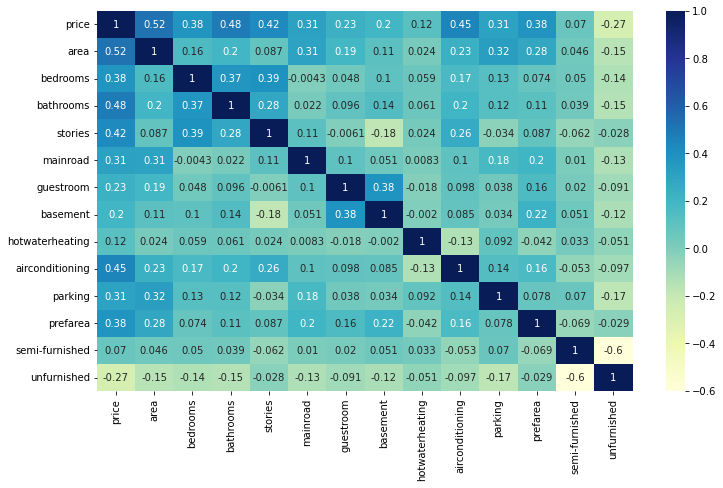

In [249]:
plt.figure(figsize=(12,7))
sns.heatmap(housing_train.corr(),annot=True,cmap= 'YlGnBu')
plt.show()

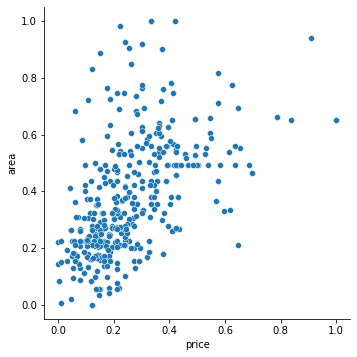

In [250]:
sns.pairplot(housing_train,x_vars='price',y_vars='area',height=5,aspect=1)
plt.show()

In [251]:
X_train=housing_train
y_train=housing_train.pop('price')

In [252]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [253]:
lm =LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [254]:
#RFE is recursive feature elimination used to eliminate the features/column which are less significant
rfe= RFE(lm,n_features_to_select=6)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=6)

In [255]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 4),
 ('guestroom', False, 7),
 ('basement', False, 6),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', False, 3),
 ('prefarea', False, 2),
 ('semi-furnished', False, 8),
 ('unfurnished', False, 5)]

In [256]:
col= X_train.columns[rfe.support_]
col

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'hotwaterheating',
       'airconditioning'],
      dtype='object')

In [257]:
#features not selected by RFE
X_train.columns[~rfe.support_]

Index(['mainroad', 'guestroom', 'basement', 'parking', 'prefarea',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [258]:
X_train_rfe= X_train[col]

In [259]:
#sm.add_constant() is a constant that represnts intercept which ensures the regression line intersects the y axis 
import statsmodels.api as sm
X_train_rfe= sm.add_constant(X_train_rfe)
lm= sm.OLS(y_train,X_train_rfe).fit()

In [260]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     82.29
Date:                Tue, 09 Jan 2024   Prob (F-statistic):           7.64e-65
Time:                        11:23:19   Log-Likelihood:                 323.00
No. Observations:                 373   AIC:                            -632.0
Df Residuals:                     366   BIC:                            -604.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0264      0.017     

In [261]:
# use VIF to check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [262]:
# VIF dataframe 
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_rfe.columns

In [263]:
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) 
                          for i in range(len(X_train_rfe.columns))] 
vif_data["VIF"] = round(vif_data["VIF"],2)
vif_data.sort_values(by=["VIF"],ascending=False)

,feature,VIF
0,const,10.47
2,bedrooms,1.30
4,stories,1.26
3,bathrooms,1.23
6,airconditioning,1.17
1,area,1.09
5,hotwaterheating,1.03


In [264]:
#Assumption says the error term is normally distributed, lets check that.
y_train_predict=lm.predict(X_train_rfe)
res= (y_train - y_train_predict)
res

35     0.019746
467   -0.047298
137    0.124385
396    0.041085
228    0.085349
         ...   
538   -0.098605
55     0.152348
361   -0.037597
85    -0.116926
532   -0.056079
Length: 373, dtype: float64

/Users/shivanitripathi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


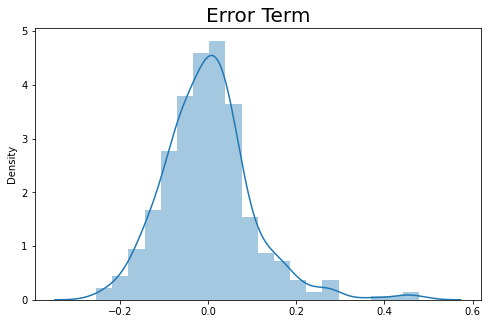

In [265]:
plt.figure(figsize=(8,5))
sns.distplot(res,bins=20)
plt.title("Error Term",fontsize=20)
plt.show()

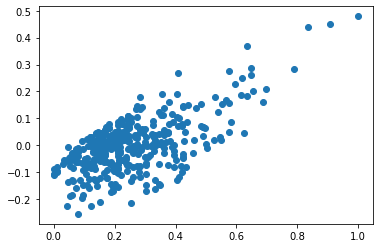

In [266]:
plt.scatter(y_train,res)

Applying the scaling to the test data

In [267]:
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [268]:
col_vars= ['price','area','bedrooms','bathrooms','stories','hotwaterheating','airconditioning']

In [269]:
housing_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
450,3150000,3450,3,1,2,1,0,1,0,0,0,0,1,0
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
247,4550000,8400,4,1,4,1,0,0,0,0,3,0,0,1
313,4095000,3680,3,2,2,1,0,0,0,0,0,0,1,0
84,6510000,3760,3,1,2,1,0,0,1,0,2,0,1,0


In [270]:
#Scaling test data for featured columns
housing_test[col_vars]= scaler.fit_transform(housing_test[col_vars])


In [271]:
y_test= housing_test.pop('price')
X_test= housing_test
X_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
450,0.184720,0.4,0.000000,0.333333,1,0,1,0.0,0.0,0,0,1,0
540,0.130918,0.2,0.000000,0.000000,1,0,1,0.0,0.0,2,0,0,1
247,0.776542,0.6,0.000000,1.000000,1,0,0,0.0,0.0,3,0,0,1
313,0.212219,0.4,0.333333,0.333333,1,0,0,0.0,0.0,0,0,1,0
84,0.221784,0.4,0.000000,0.333333,1,0,0,1.0,0.0,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,0.996533,0.2,0.000000,0.000000,1,0,0,0.0,1.0,2,1,0,1
442,0.093137,0.2,0.000000,0.000000,1,0,0,0.0,1.0,1,0,0,1
162,0.561334,0.6,0.333333,0.333333,1,1,1,0.0,0.0,0,1,1,0
534,0.130918,0.6,0.000000,0.333333,1,0,0,0.0,0.0,0,0,0,1


In [272]:
X_test=sm.add_constant(X_test)
X_test

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
450,1.0,0.184720,0.4,0.000000,0.333333,1,0,1,0.0,0.0,0,0,1,0
540,1.0,0.130918,0.2,0.000000,0.000000,1,0,1,0.0,0.0,2,0,0,1
247,1.0,0.776542,0.6,0.000000,1.000000,1,0,0,0.0,0.0,3,0,0,1
313,1.0,0.212219,0.4,0.333333,0.333333,1,0,0,0.0,0.0,0,0,1,0
84,1.0,0.221784,0.4,0.000000,0.333333,1,0,0,1.0,0.0,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,1.0,0.996533,0.2,0.000000,0.000000,1,0,0,0.0,1.0,2,1,0,1
442,1.0,0.093137,0.2,0.000000,0.000000,1,0,0,0.0,1.0,1,0,0,1
162,1.0,0.561334,0.6,0.333333,0.333333,1,1,1,0.0,0.0,0,1,1,0
534,1.0,0.130918,0.6,0.000000,0.333333,1,0,0,0.0,0.0,0,0,0,1


In [273]:
#Eliminating non featured columns from the test data
X_test_rfe=X_test[X_train_rfe.columns]
X_test_rfe

,const,area,bedrooms,bathrooms,stories,hotwaterheating,airconditioning
450,1.0,0.184720,0.4,0.000000,0.333333,0.0,0.0
540,1.0,0.130918,0.2,0.000000,0.000000,0.0,0.0
247,1.0,0.776542,0.6,0.000000,1.000000,0.0,0.0
313,1.0,0.212219,0.4,0.333333,0.333333,0.0,0.0
84,1.0,0.221784,0.4,0.000000,0.333333,1.0,0.0
...,...,...,...,...,...,...,...
224,1.0,0.996533,0.2,0.000000,0.000000,0.0,1.0
442,1.0,0.093137,0.2,0.000000,0.000000,0.0,1.0
162,1.0,0.561334,0.6,0.333333,0.333333,0.0,0.0
534,1.0,0.130918,0.6,0.000000,0.333333,0.0,0.0


In [274]:
y_predict= lm.predict(X_test_rfe)

In [275]:
from sklearn.metrics import mean_squared_error,r2_score


In [276]:
mean_squared_error= mean_squared_error(y_test,y_predict)
r_squared= r2_score(y_test,y_predict)

In [290]:
print("Mean Squared Error :",mean_squared_error )
print("R squared :", r_squared)

Mean Squared Error : 0.014587004858725907
R squared : 0.578508234925572


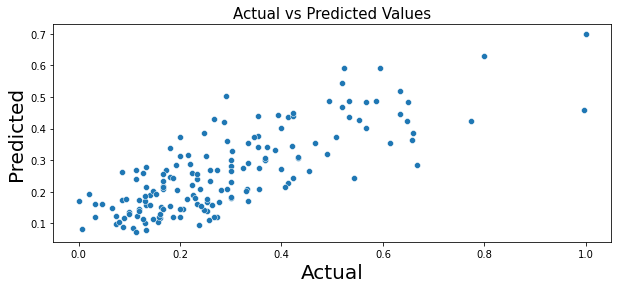

In [284]:
#Plotting y_test column to the predicted one
plt.figure(figsize=(10,4))
sns.scatterplot(x=y_test,y=y_predict)
plt.xlabel('Actual',fontsize=20)
plt.ylabel('Predicted',fontsize=20)
plt.title("Actual vs Predicted Values",fontsize= 15)
plt.show()

In [278]:
#column wise comparison of predicted vs true value
new_df=pd.DataFrame(data={'predictions': y_predict, 'actual': y_test})
new_df

,predictions,actual
450,0.157859,0.133333
540,0.083128,0.006667
247,0.429350,0.266667
313,0.220695,0.223333
84,0.264443,0.453333
...,...,...
224,0.420180,0.286667
442,0.157619,0.140000
162,0.340865,0.353333
534,0.160926,0.033333


/Users/shivanitripathi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


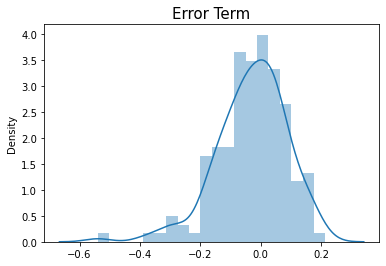

In [288]:
error= y_predict- y_test
sns.distplot(error, bins= 20)
plt.title("Error Term",fontsize= 15)
plt.show()

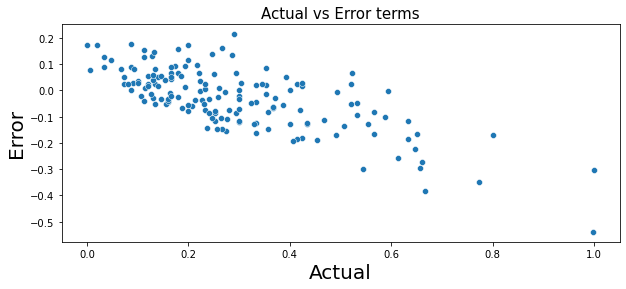

In [289]:
plt.figure(figsize=(10,4))
sns.scatterplot(x=y_test,y=error)
plt.xlabel('Actual',fontsize=20)
plt.ylabel('Error',fontsize=20)
plt.title("Actual vs Error terms",fontsize= 15)
plt.show()

### Summary- Model is doing well, with R squared value greater than 50 % meaning the model predicts more than 50% values correctly. Mean Squared value is also signoificantly low which means the the difference between actual and predicted value is much lower. 
### Using feature engineering we elimintaed the columns which were less significant and also checked the multicollinearity for all the independent variables.Based on that none of the variables were highly correlated to each other.
### Based on the above observation and the coefficients derived from the Ordinary Least Squares regression summary, the equation for best fitted line came out as:

### price = 0.3 * area + 0.09 * bedrooms + 0.16 * bathrooms + 0.12 * stories + 0.1 * hotwaterheating + 0.09 * airconditioning
